

# The Movie Database: Dataset Investigation

## Reported by Jubril Okunade


## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> In this section of the report, I will give a short introduction about the dataset that I'll be performing my analysis on. At the close of this section, I will put forward some questions which will guide my analysis.

> The dataset I will be using is the **TMDb movie data**. It contains information on over 10,000 movies collected from the The Movie Database. The dataset also contains information about the cast, budget, popularity and also the release year of the movies.

<ul>
    <h3><b>Questions to be investigated in this dataset:</b></h3>
    <p><li>what kinds of properties are associated with movies that have high revenues?</li>
        <li>what kinds of properties are associated with movies that have high popularity?</li></p>
</ul>

> I will be answering these questions through my analysis of the dataset.

In [6]:
# Import statements for all of the packages that will be used

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

>Now that all the packages have been imported, we can move on to the Data Wrangling section.

<a id='wrangling'></a>
## Data Wrangling

<ul>
    <div><b>This section involves the following:</b></div>
    <li>Loading the TMDb dataset.</li>
    <li>Assessing the TMDb dataset to identify any problems with it's quality.</li>
    <li>Cleaning the dataset in preparation for the analysis.</li>
</ul>



### Loading the TMDb dataset

In [8]:
# Load dataset and name it "data"

data = pd.read_csv('tmdb-movies.csv')

# Create a copy of the dataset 
# This will allow the orginial dataset to remain intact even if i make a permanent error in the copy.

df = data.copy()

# Quick check to ensure the dataset loaded properly.
df.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


>After doing a quick check to ensure the dataset was loaded properly into the notebook. I did a browse of the columns. We have an __ID__ column which probably refers to the unique id that was given to each movie when they were being entered into the dataset. We have a **Genre** column which describes which categories of genre the film falls into. I observed that some movies could sometimes fall into multiple genres. we also have the **release_date** column, the __budget__ column and the **revenue** column which speak to the budget for each movie as well as the revenue generated respectively. Other  noteable columns include release_year, popularity, vote_count and vote_average.

### Assessing the TMDb dataset to identify any problems with it's quality

In [10]:
# check the shape of the dataset
df.shape

(10866, 21)

>Upon checking the shape of the dataset, I observed that this dataset contains 10,866 rows and 21 columns. This will help me when I'm trying to find the columns with missing data.

In [11]:
# check the structure of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

>With the __info__ function i was able to get the number of non-null items in each column and also I can see which columns have missing values. We can observe that there are missing values in the following columns: *imdb_id*, _cast_, *homepage*, _director_, *tagline*, _keywords_, *overview*, *genres*, _production_companies_.

In [12]:
# check for some descriptive statisitcs about the dataset
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


<ul>
    <div><b>From the data above, I noticed a few key things:</b></div>
    <li>The highest number of votes gotten by a movie was 9,767.</li>
    <li>The longest runtime for a movie was 900 minutes and the average runtime for a movie was 102 minutes.</li>
 </ul>

<ul>
    <h3><b>Cleaning the dataset</b></h3>
    <p>This will invole the following:</p>
    <li>Removing irrelevant columns.</li>
    <li>Cleaning null values.</li>
    <li>Convert release_date from object to datetime datatype.</li>
    <li>Check for duplicates and drop duplicates found.</li>
</ul>

#### Removing irrelevant columns

In [15]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, I will go ahead to clean the dataset.

#Removing irrelevant columns:
# assign columns to be dropped to a variable
ir_col = ['id','imdb_id','cast','homepage','director','tagline','keywords','overview','production_companies','budget_adj','revenue_adj']

# drop ir_col:
df.drop(ir_col,axis=1,inplace=True)

# Check to see if columns drop is successful:
df.head(1)

,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year
0,32.985763,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015


> In the cell above i dropped some columns which i deemed to be irrelevant to my analysis. I assigned the irrelevant columns to a list variable <b><i>ir_col</i></b> and then dropped them using the drop function.

#### Cleaning null values

In [19]:
# Cleaning null values

# check for null values
df.isnull().sum()

# drop null values
df.dropna(inplace=True)

# check if drop is successful
df.isnull().sum()

popularity        0
budget            0
revenue           0
original_title    0
runtime           0
genres            0
release_date      0
vote_count        0
vote_average      0
release_year      0
dtype: int64

> In the cell above, I removed the null values from the dataset. I first checked for null values using the <b><i>.isnull</i></b> function. It showed that there were 23 null values in the genres column. I then proceeded to drop the 23 null values with the <b><i>.dropna</i></b> function. Finally, I did a qucik check to ensure the drop was successful.

#### Convert release_date from object to datetime datatype

In [24]:
# Convert release_date to datetime:

# check current datatype for release_date column:
df.release_date.dtype

# change to datetime:
df.release_date = pd.to_datetime(df.release_date)

# check if operation is successful:
df.release_date.dtype

dtype('<M8[ns]')

> In the cell above, I converted the datatype of the **release_date** column to datetime. First, I checked the current datatype of the column which showed that it had the **object** datatype. I then converted it to datetime.

#### Check for duplicates and drop duplicates found

In [28]:
# Cleaning duplicates

# check for duplicates:
sum(df.duplicated())

# drop duplicate data:
df.drop_duplicates(inplace=True)

# check if operation was successful:
sum(df.duplicated())

0

>In the cell above, I cleaned the dataset by removing duplicate data. I checked for the number of duplicates which revealed tha there was 1 duplicate. I then proceeded to drop it.

<a id='eda'></a>
## Exploratory Data Analysis

>In this section, I will perform analysis and do visualizations that will help to find patterns within the dataset. My goal in  this section is to use the analysis performed to provide possible answers to the questions I raised earlier in the **introduction section**.

### Research Question 1: 
### what kinds of properties are associated with movies that have big revenues?

<ul>
    <div><b>For this research question, i will be conductiing the following:</b></div>
    <li>Examine the revenue column</li>
    <li>Extract the high revenues.</li>
    <li>Find relationships between high revenues and other columns</li>
    <li>Find out the change in revenues from year to year</li>
</ul>

#### Examine the revenue column

In [29]:
# First, we take a Look at the descriptive statistics of the revenue column:
df.revenue.describe()

count    1.084200e+04
mean     3.991138e+07
std      1.171179e+08
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      2.414118e+07
max      2.781506e+09
Name: revenue, dtype: float64

>The cell above provides statistical information about the revenue column. 

<AxesSubplot:>

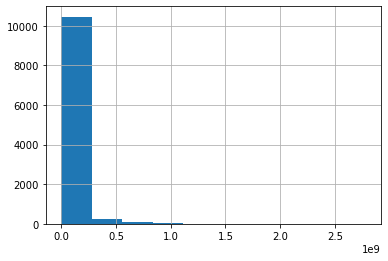

In [109]:
# draw a histogram of the revenue column
df.revenue.hist()

>The histogram above shows a distribution of the revenue column.

#### Extract the high revenues

In [38]:
# Extract the high revenues and assign them to a variable:
rev_hi = df.revenue.quantile(q=.75)

# Extract movies with revenues greater than 75th quantile:
hi_rev = df[df.revenue > rev_hi ]

# check to see if operation is successful
hi_rev.revenue.describe()

count    2.711000e+03
mean     1.534082e+08
std      1.939356e+08
min      2.414561e+07
25%      4.480000e+07
50%      8.636982e+07
75%      1.772410e+08
max      2.781506e+09
Name: revenue, dtype: float64

>Following the operation above, I have successfully created a dataframe **hi_rev** containing the movies with high revenues in the dataset.

#### Find relationships between high revenues and other columns

>For this part of the exploration process, I wanted to find out whether there are relationships between high revenues and some specific columns. I chose the following columns : *popularity*,*budget*,*runtime* and *vote_average*. I will plot each of these properties against the revenue column under the dataframe **hi_rev** which is the dataframe that contains movies with high revenues. Finally, I will check for the correlation between high revenues and these properties.

##### Creating a function

In [115]:
#Create a function to plot visualizations for each property

def graph(dframe,prop,y):
    for col in prop:
        plt.scatter(dframe[col],dframe[y])
        plt.title(f'Relationship between {col} and {y}')
        plt.xlabel(f'{col}')
        plt.ylabel(f'{y}')
        plt.show()

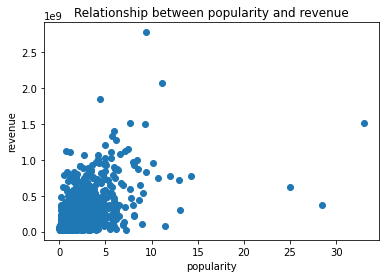

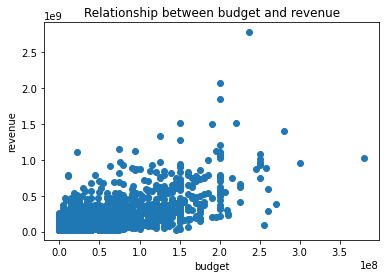

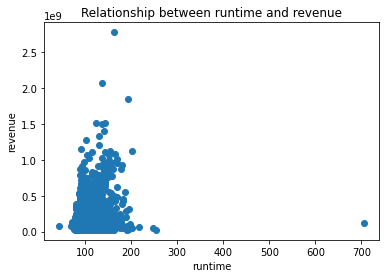

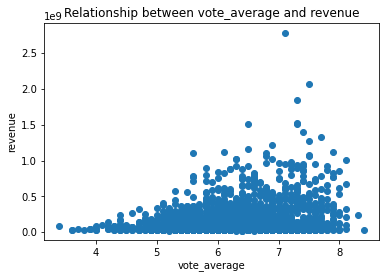

In [102]:
# plot the visualizations for popularity,budget,runtime,vote_average against high revenue

prop_lst = ['popularity','budget','runtime','vote_average']
y1 = 'revenue'

graph(hi_rev,prop_lst,y1)

#### Reasoning for plot

> In the operation above, I plotted scatterplots for each property against revenue. This was done to find out what kind of relationship each property has with high revenues. Now I will proceed to calculate the correlations.

In [47]:
# Check for correlation between high revenues and popularity
hi_rev[['revenue','popularity']].corr()

,revenue,popularity
revenue,1.000000,0.582073
popularity,0.582073,1.000000


> From the chart provided as well as the calculation done above, we see that there is a **strong positive** correlation between high revenues and populairty with a coefficient of **0.58**.

In [50]:
# Check for correlation between high revenues and budget
hi_rev[['revenue','budget']].corr()

,revenue,budget
revenue,1.000000,0.660688
budget,0.660688,1.000000


>From the chart provided as well as the calculation done above, we see that there is a **strong positive** correlation between high revenues and budget with a coefficient of **0.66**.

In [52]:
# Check for correlation between high revenues and runtime
hi_rev[['revenue','runtime']].corr()

,revenue,runtime
revenue,1.000000,0.202144
runtime,0.202144,1.000000


>From the chart provided as well as the calculation done above, we see that there is a **Weak positive** correlation between high revenues and runtime with a coefficient of **0.2**.

In [54]:
# Check for correlation between high revenues and vote_average
hi_rev[['revenue','vote_average']].corr()

,revenue,vote_average
revenue,1.000000,0.219513
vote_average,0.219513,1.000000


>From the chart provided as well as the calculation done above, we see that there is a **Weak positive** correlation between high revenues and vote_average with a coefficient of **0.22**.

#### Find out the change in big revenues from year to year

>To accomplish this I plan to plot a line chart showing whether the change in big revenues has been significant or little over the years. This will involve plotting the release_year against big revenues.

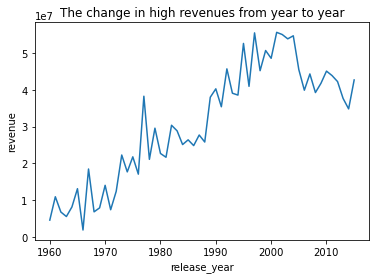

In [117]:
# plot line chart showing chnage in big revenues

# first gorup the dataframe by release_year
reve = df.groupby('release_year')['revenue'].mean()

plt.plot(reve)
plt.title('The change in high revenues from year to year')
plt.xlabel('release_year')
plt.ylabel('revenue')
plt.show()

#### Reasoning for plot 

>From the line chart above we that there was a significant spike in the movies that made revenues from the 1970's onwards. We can see an increasing trend in the revenue from an over all perspective.

### Research Question 2: what kinds of properties are associated with movies that have high popularity?

<ul>
    <div><b>For this research question, i will be conductiing the following:</b></div>
    <li>Examine the popularity column.</li>
    <li>Extract the high popularity values.</li>
    <li>Find relationships between high popularity and other columns</li>
</ul>

#### Examine the popularity column

In [57]:
# First, we take a Look at the descriptive statistics of the popularity column:
df.popularity.describe()

count    10842.000000
mean         0.647461
std          1.001032
min          0.000065
25%          0.208210
50%          0.384532
75%          0.715393
max         32.985763
Name: popularity, dtype: float64

>The cell above provides statistical information about the popularity column.

<AxesSubplot:>

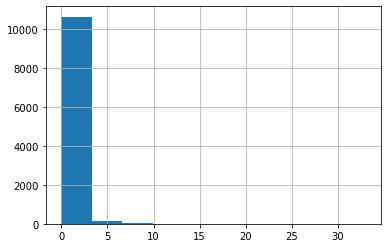

In [110]:
# draw a histogram of the popularity column
df.popularity.hist()

>The histogram above shows a distribution of the popularity column.

#### Extract the high popularity values

In [59]:
# Extract high popularity values
hi_po = df.popularity.quantile(q=.75)

# Extract movies with popularity greater than 75th quantile
po_hi = df[df.popularity > hi_po]

# check to see if operaiton is successful
po_hi.popularity.describe()

count    2711.000000
mean        1.658860
std         1.596260
min         0.715437
25%         0.904567
50%         1.180484
75%         1.821492
max        32.985763
Name: popularity, dtype: float64

>Following the operation above, I have successfully created a dataframe **po_hi** containing the movies with high popularity values in the dataset.

#### Find relationships between high popularity and other columns

> I wanted to find out whether there are relationships between high popularity values and some specific columns. I chose the following columns : budget, runtime and vote_average. I will plot each of these properties against the popularity column under the dataframe po_hi which is the dataframe that contains movies high popularity values. Finally, I will check for the correlation between high popularity and these properties.

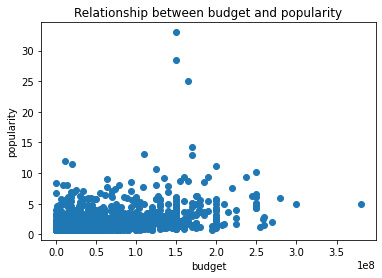

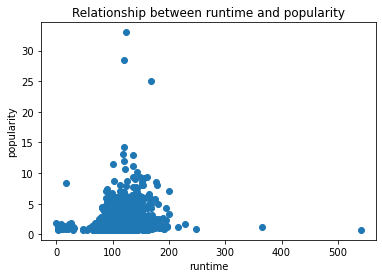

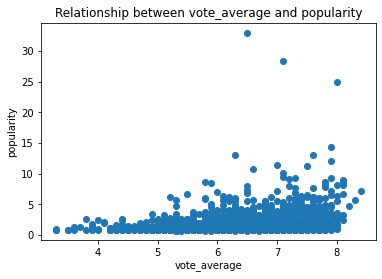

In [111]:
# plot the visualizations for popularity,budget,runtime,vote_average against high popularity using the graph function I created.

prop_lst2 = ['budget','runtime','vote_average']
y2 = 'popularity'

graph(po_hi,prop_lst2,y2)

#### Reasoning for plot

>In the operation above, I plotted scatterplots for each property against popularity. This was done to find out what kind of relationship each property has with high popularity. Now I will proceed to calculate the correlations.

In [112]:
# Check for correlation high popularity and budget
po_hi[['popularity','budget']].corr()

,popularity,budget
popularity,1.000000,0.395007
budget,0.395007,1.000000


>From the chart provided as well as the calculation done above, we see that there is a **Weak positive** correlation between high popularity and budget with a coefficient of **0.4**.

In [113]:
# Check for correlation high popularity and runtime
po_hi[['popularity','runtime']].corr()

,popularity,runtime
popularity,1.000000,0.204325
runtime,0.204325,1.000000


>From the chart provided as well as the calculation done above, we see that there is a **Weak positive** correlation between high popularity and runtime with a coefficient of **0.2**.

In [114]:
# Check for correlation high popularity and vote_average
po_hi[['popularity','vote_average']].corr()

,popularity,vote_average
popularity,1.000000,0.289767
vote_average,0.289767,1.000000


>From the chart provided as well as the calculation done above, we see that there is a **Weak positive** correlation between high popularity and vote_average with a coefficient of **0.3**.

<a id='conclusions'></a>
## Conclusions

<ul>
    <div><b>The following conclusions can be drawn from the analysis:</b></div>
    <li>There revenue of high revenues(<b>hi_rev</b>) shows a strong positive correlation with the budget and the popularity.</li>
    <li>There revenue of high revenues(<b>hi_rev</b>) shows a weak correlation with the runtime and the vote_average.</li>
    <li>There popularity of high popularity((<b>po_hi</b>) shows a weak correlation with the budget, runtime and vote_average.</li>
    <li>there was a significant spike in the movies that made high revenues from the 1970's onwards.</li>
    <li>We can see an increasing trend in the revenue from an over all perspective.</li>
</ul>


### Limitation

>For this section of the report, I will draw some conclusions based on the analysis that I carried out in the sections above. **However, it is important to note that the conclusions drawn from this analysis are limited**. This is because a significant portion of the original data had been removed during the cleaning process. Therefore, I worked with a much smaller sample size and as such does not necessarily represent the population.